In [1]:
# 필요한 라이브러리 import

import platform
import folium
import math
import geopandas 
from tqdm import tqdm 
from shapely import wkt
from shapely.geometry import Point, Polygon, LineString

import numpy as np
import pandas as pd

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import geopandas as gpd

#시각화 모듈
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


# 한글 글자 깨짐 방지
plt.rcParams["font.family"] = 'Nanum Gothic'
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')


# 불필요한 경고 표시 생략

#import warnings
#warnings.filterwarnings(action = 'ignore')

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


#  1. Data load
---

- 컬럼 순서조정

In [2]:
full_table = gpd.read_file('full_table_pt1.geojson')

In [3]:
full_table.columns

Index(['index', 'gid', 'acci_cnt', '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지', 'CCTV', '총인구', '고령인구', '노동가능인구', '유소년인구', '유턴금지', '교차로', '건물면적', '차량등록대수', '중앙분리대', '전체_추정교통량', '승용차_추정교통량', '버스_추정교통량', '화물차_추정교통량', '혼잡빈도강도', '혼잡시간강도', '일강수량(mm)', '일 최심적설(cm)', '평균기온(°C)', '평균 풍속(m/s)', '평균 지면온도(°C)', '안개 계속시간(hr)', 'geometry'], dtype='object')

In [4]:
full_table = full_table[['gid','geometry' ,'acci_cnt',  '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구', '고령인구', '노동가능인구', '유소년인구',
                         '유턴금지', '교차로', '건물면적', '차량등록대수', '중앙분리대', '전체_추정교통량', 
                         '승용차_추정교통량', '버스_추정교통량', '화물차_추정교통량', '혼잡빈도강도', '혼잡시간강도', 
                         '일강수량(mm)', '일 최심적설(cm)', '평균기온(°C)', '평균 풍속(m/s)', '평균 지면온도(°C)', '안개 계속시간(hr)']]

In [5]:
full_table.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12179 entries, 0 to 12178
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gid          12179 non-null  object  
 1   geometry     12179 non-null  geometry
 2   acci_cnt     12179 non-null  int64   
 3   보행신호등        12179 non-null  int64   
 4   차량신호등        12179 non-null  int64   
 5   안전지대         12179 non-null  int64   
 6   횡단보도         12179 non-null  int64   
 7   도로속도         12179 non-null  int64   
 8   정차금지대        12179 non-null  int64   
 9   교통안전표지       12179 non-null  int64   
 10  CCTV         12179 non-null  int64   
 11  총인구          12179 non-null  int64   
 12  고령인구         12179 non-null  int64   
 13  노동가능인구       12179 non-null  int64   
 14  유소년인구        12179 non-null  int64   
 15  유턴금지         12179 non-null  int64   
 16  교차로          12179 non-null  int64   
 17  건물면적         12179 non-null  float64 
 18  차량등록대수       12179

In [6]:
full_table.head()

,gid,geometry,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,고령인구,노동가능인구,유소년인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,승용차_추정교통량,버스_추정교통량,화물차_추정교통량,혼잡빈도강도,혼잡시간강도,일강수량(mm),일 최심적설(cm),평균기온(°C),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr)
0,다바866110,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ...",0,0,0,0,0,0,0,0,0,13,0,10,0,0,0,146.59,4,0,8283.000,6998.500,91.500,1192.500,0.3500,2.74000,0.0,0.00,0.0,0.00,0.0,0.0
1,다바823157,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ...",0,3,4,2,3,0,0,14,0,267,25,198,44,0,1,5944.98,0,0,1181.625,1021.875,10.125,149.875,21.1575,38.47125,0.0,0.00,0.0,0.00,0.0,0.0
2,다바928260,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ...",0,6,5,0,4,3,0,14,0,78,0,65,8,0,2,1487.49,40,0,3783.750,3263.500,32.500,488.125,48.0125,70.80250,0.0,0.00,0.0,0.00,0.0,0.0
3,다바931203,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ...",2,1,3,1,1,2,0,5,0,0,0,0,0,0,0,1291.19,409,0,11596.000,9698.000,132.000,1765.500,97.3600,98.50000,2.1,1.65,14.1,1.25,15.0,0.0
4,다바836109,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ...",0,2,0,0,2,0,0,6,0,396,28,339,29,0,0,12875.52,0,0,678.875,610.000,5.500,63.500,48.4675,65.44500,0.0,0.00,0.0,0.00,0.0,0.0


#  2. Correlation plot

Correlation plot 함수화

In [7]:
## correlation plot 
def cor(df):  
    # plot size 설정 
    f, ax = plt.subplots(figsize=(20,20))

    # upper matrix
    matrix = np.triu(df.corr())

    # palette 
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(df.corr(),
                    annot=True,  #실제값 표시
                    annot_kws={"size": 7}, #실제값 크기
                    fmt ='.1g', #실제값 소수점 수 지정
                    linewidths=5, # 경계면 간격 설정 (커질수록 구분 쉬움)
                    center = 0, vmin=-1, vmax=1, #컬러바 범위 -1 ~ 1
                    cmap = colormap, 
                    cbar = True, # 컬러바 표시 여부
                    cbar_kws= {"shrink": 0.5} ,  # 0.5 : 컬러바 크기 반으로 줄임
                    square = True, 
                    mask = matrix) # 표시하지 않을 부분 지정
    plt.show()
    #plt.savefig('correlation_plot.png')

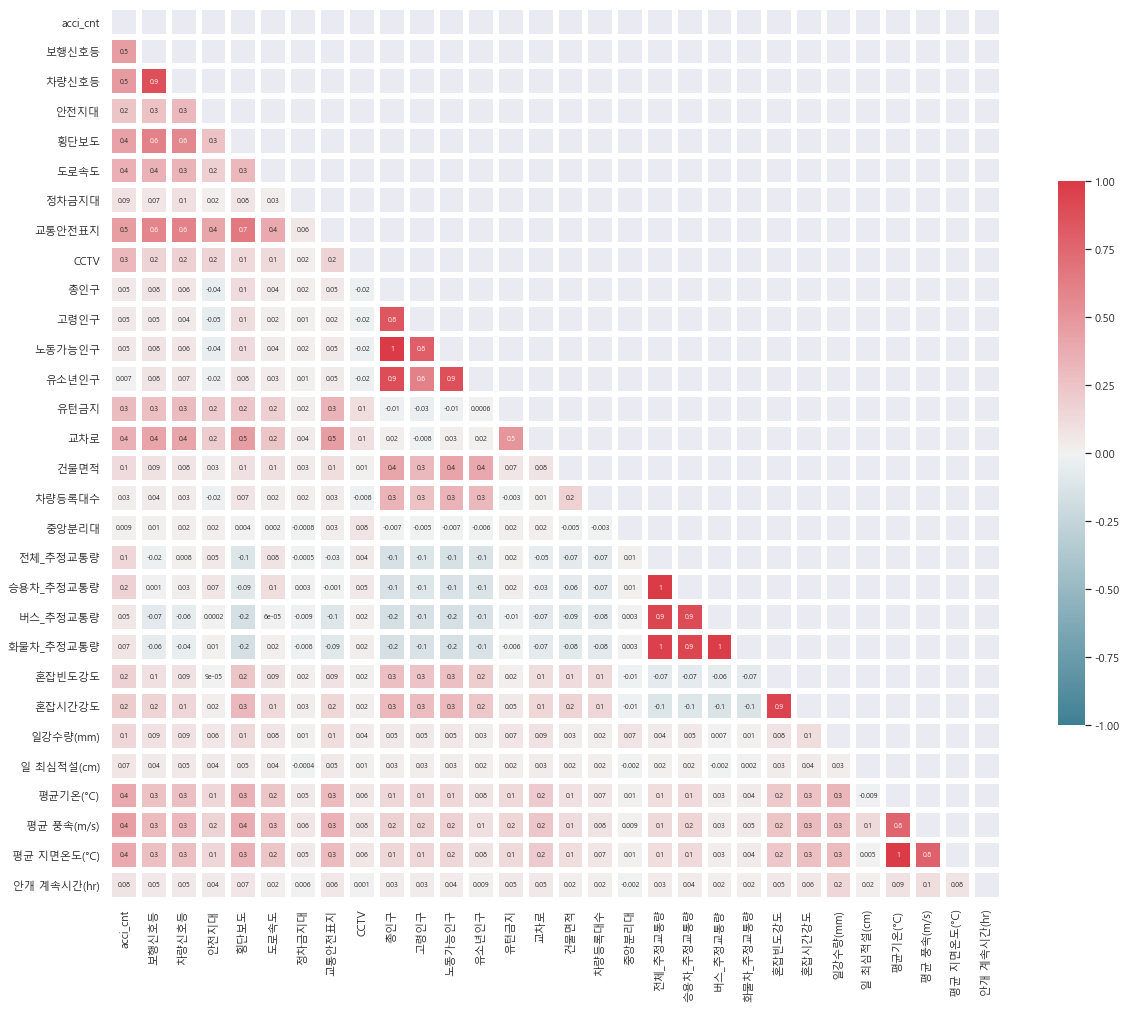

In [8]:
# 현재 테이블 correlation확인
cor(full_table)

- 인구관련 지표들은 correlation이 상당히 높다.
- 교통량 관련 지표들도 correlation이 상당히 높다.
- 평균기온과 평균 지면온도의 correlation은 1이다. 
- 혼잡빈도강도와 혼잡시간강도간의 correlation도 상당히 높다.
---
- 위와 같은 feature들은 특정 feature를 삭제하거나 전처리를 해줄 필요가 있다.
- 이번 분석에서는 VIF 지수 확인을 통해 일정 기준 이상의 features는 제거한다.

# 3. VIF 지수 확인 (10이상 feature에서 제거)

In [9]:
#다중공선성 체크

def vif(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # 피처마다의 VIF 계수를 출력(소수점 4째자리까지만 출력)
    pd.options.display.float_format = '{:.4f}'.format

    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['features'] = X.columns
    print(vif)
    print('\n')
    return vif[vif['VIF Factor']>10]

In [10]:
trial1 = full_table.loc[:,'보행신호등':'안개 계속시간(hr)']
#y = full_table.loc[:,'acci_cnt']

In [11]:
vif(trial1)

        VIF Factor     features
0           5.5485        보행신호등
1           5.5590        차량신호등
2           1.3824         안전지대
3           3.3121         횡단보도
4           1.5344         도로속도
5           1.0182        정차금지대
6           3.7082       교통안전표지
7           1.0706         CCTV
8       11374.0931          총인구
9         309.1710         고령인구
10       6148.8239       노동가능인구
11        217.1797        유소년인구
12          1.4467         유턴금지
13          1.8824          교차로
14          1.3863         건물면적
15          1.1914       차량등록대수
16          1.0136        중앙분리대
17 1032590629.0881     전체_추정교통량
18  560255683.8377    승용차_추정교통량
19     610527.8110     버스_추정교통량
20   65471945.4612    화물차_추정교통량
21         27.2813       혼잡빈도강도
22         32.9525       혼잡시간강도
23          1.3061     일강수량(mm)
24          1.0686   일 최심적설(cm)
25        131.6913     평균기온(°C)
26          4.9612   평균 풍속(m/s)
27        140.0955  평균 지면온도(°C)
28          1.0580  안개 계속시간(hr)




,VIF Factor,features
8,11374.0931,총인구
9,309.1710,고령인구
10,6148.8239,노동가능인구
11,217.1797,유소년인구
17,1032590629.0881,전체_추정교통량
18,560255683.8377,승용차_추정교통량
19,610527.8110,버스_추정교통량
20,65471945.4612,화물차_추정교통량
21,27.2813,혼잡빈도강도
22,32.9525,혼잡시간강도


- 교통 추정량은 중요데이터 - 타 교통량 데이터(승용차, 화물, 버스)를 포괄하는 전체 교통 추정량만 사용하고 나머지 제외
- 평균 기온과 평균 지면온도 둘중 하나는 들어가는 것이 좋다고 판단, 특히 지면온도는 도로상태와 더 연관성이 깊다고 가정(도메인)하여 평균온도를 제외

In [12]:
trial2 = full_table[['보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구', '고령인구','노동가능인구', '유소년인구',
                         '유턴금지','교차로', '건물면적', '차량등록대수', '전체_추정교통량','중앙분리대', '혼잡빈도강도', '혼잡시간강도',
                         '일강수량(mm)', '일 최심적설(cm)', '평균 풍속(m/s)', '평균 지면온도(°C)'
                         , '안개 계속시간(hr)']]

In [13]:
vif(trial2)

    VIF Factor     features
0       5.5335        보행신호등
1       5.5452        차량신호등
2       1.3787         안전지대
3       3.3069         횡단보도
4       1.5133         도로속도
5       1.0182        정차금지대
6       3.6522       교통안전표지
7       1.0705         CCTV
8   11303.8518          총인구
9     307.4572         고령인구
10   6111.5435       노동가능인구
11    215.7068        유소년인구
12      1.4461         유턴금지
13      1.8789          교차로
14      1.3846         건물면적
15      1.1913       차량등록대수
16      1.5918     전체_추정교통량
17      1.0131        중앙분리대
18     26.2357       혼잡빈도강도
19     31.1646       혼잡시간강도
20      1.2052     일강수량(mm)
21      1.0583   일 최심적설(cm)
22      4.7222   평균 풍속(m/s)
23      4.0933  평균 지면온도(°C)
24      1.0549  안개 계속시간(hr)




,VIF Factor,features
8,11303.8518,총인구
9,307.4572,고령인구
10,6111.5435,노동가능인구
11,215.7068,유소년인구
18,26.2357,혼잡빈도강도
19,31.1646,혼잡시간강도


타 인구 데이터를 포괄하는 총인구만 사용 - 나머지 제외

In [15]:
trial3 = full_table[['보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구','유턴금지','교차로', '건물면적',
                     '차량등록대수', '전체_추정교통량','중앙분리대', '혼잡시간강도','혼잡빈도강도',
                     '일강수량(mm)', '일 최심적설(cm)', '평균 풍속(m/s)', '평균 지면온도(°C)'
                         , '안개 계속시간(hr)']]

In [16]:
vif(trial3)

    VIF Factor     features
0       5.5268        보행신호등
1       5.5421        차량신호등
2       1.3760         안전지대
3       3.2716         횡단보도
4       1.5128         도로속도
5       1.0180        정차금지대
6       3.6456       교통안전표지
7       1.0704         CCTV
8       1.7764          총인구
9       1.4449         유턴금지
10      1.8724          교차로
11      1.3715         건물면적
12      1.1886       차량등록대수
13      1.5899     전체_추정교통량
14      1.0130        중앙분리대
15     30.8927       혼잡시간강도
16     26.2063       혼잡빈도강도
17      1.2049     일강수량(mm)
18      1.0580   일 최심적설(cm)
19      4.7047   평균 풍속(m/s)
20      4.0853  평균 지면온도(°C)
21      1.0532  안개 계속시간(hr)




,VIF Factor,features
15,30.8927,혼잡시간강도
16,26.2063,혼잡빈도강도


혼잡시간강도만 제외하고 재시도

In [17]:
trial4 = full_table[['보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구','유턴금지','교차로', '건물면적',
                     '차량등록대수', '전체_추정교통량','중앙분리대','혼잡빈도강도','일강수량(mm)',
                     '일 최심적설(cm)', '평균 풍속(m/s)', '평균 지면온도(°C)', '안개 계속시간(hr)']]

In [18]:
vif(trial4)

    VIF Factor     features
0       5.5267        보행신호등
1       5.5421        차량신호등
2       1.3760         안전지대
3       3.2627         횡단보도
4       1.5082         도로속도
5       1.0179        정차금지대
6       3.5459       교통안전표지
7       1.0686         CCTV
8       1.7538          총인구
9       1.4449         유턴금지
10      1.8721          교차로
11      1.3631         건물면적
12      1.1883       차량등록대수
13      1.5462     전체_추정교통량
14      1.0129        중앙분리대
15      2.3146       혼잡빈도강도
16      1.2044     일강수량(mm)
17      1.0578   일 최심적설(cm)
18      4.6934   평균 풍속(m/s)
19      4.0826  평균 지면온도(°C)
20      1.0531  안개 계속시간(hr)




,VIF Factor,features


혼잡빈도강도를 제외하고 혼잡시간강도를 다시 포함시켜 결과치 비교

In [19]:
trial5 = full_table[['보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도',
                         '정차금지대', '교통안전표지', 'CCTV', '총인구','유턴금지','교차로', '건물면적',
                     '차량등록대수', '전체_추정교통량','중앙분리대','혼잡시간강도','일강수량(mm)',
                     '일 최심적설(cm)', '평균 풍속(m/s)', '평균 지면온도(°C)', '안개 계속시간(hr)']]

In [20]:
vif(trial5)

    VIF Factor     features
0       5.5245        보행신호등
1       5.5420        차량신호등
2       1.3760         안전지대
3       3.2709         횡단보도
4       1.5098         도로속도
5       1.0180        정차금지대
6       3.5794       교통안전표지
7       1.0692         CCTV
8       1.7752          총인구
9       1.4448         유턴금지
10      1.8710          교차로
11      1.3654         건물면적
12      1.1886       차량등록대수
13      1.5837     전체_추정교통량
14      1.0128        중앙분리대
15      2.7285       혼잡시간강도
16      1.2045     일강수량(mm)
17      1.0579   일 최심적설(cm)
18      4.7030   평균 풍속(m/s)
19      4.0852  평균 지면온도(°C)
20      1.0532  안개 계속시간(hr)




,VIF Factor,features


상대적으로 수치가 안정적인 혼잡빈도강도를 사용하고 혼잡시간 강도는 제외 -> 최종적으로 trial4의 feature들 사용

In [23]:
trial4.columns

Index(['보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지', 'CCTV', '총인구', '유턴금지', '교차로', '건물면적', '차량등록대수', '전체_추정교통량', '중앙분리대', '혼잡빈도강도', '일강수량(mm)', '일 최심적설(cm)', '평균 풍속(m/s)', '평균 지면온도(°C)', '안개 계속시간(hr)'], dtype='object')

# 3. 최종 테이블 만들기

In [24]:
final_table = full_table.drop(['고령인구','노동가능인구', '유소년인구', '승용차_추정교통량', '버스_추정교통량', 
                         '화물차_추정교통량','혼잡시간강도','평균기온(°C)'], axis=1)

In [25]:
final_table.columns

Index(['gid', 'geometry', 'acci_cnt', '보행신호등', '차량신호등', '안전지대', '횡단보도', '도로속도', '정차금지대', '교통안전표지', 'CCTV', '총인구', '유턴금지', '교차로', '건물면적', '차량등록대수', '중앙분리대', '전체_추정교통량', '혼잡빈도강도', '일강수량(mm)', '일 최심적설(cm)', '평균 풍속(m/s)', '평균 지면온도(°C)', '안개 계속시간(hr)'], dtype='object')

In [26]:
final_table

,gid,geometry,acci_cnt,보행신호등,차량신호등,안전지대,횡단보도,도로속도,정차금지대,교통안전표지,CCTV,총인구,유턴금지,교차로,건물면적,차량등록대수,중앙분리대,전체_추정교통량,혼잡빈도강도,일강수량(mm),일 최심적설(cm),평균 풍속(m/s),평균 지면온도(°C),안개 계속시간(hr)
0,다바866110,"MULTIPOLYGON (((127.35076 36.29622, 127.35076 ...",0,0,0,0,0,0,0,0,0,13,0,0,146.5900,4,0,8283.0000,0.3500,0.0000,0.0000,0.0000,0.0000,0.0000
1,다바823157,"MULTIPOLYGON (((127.30277 36.33853, 127.30276 ...",0,3,4,2,3,0,0,14,0,267,0,1,5944.9800,0,0,1181.6250,21.1575,0.0000,0.0000,0.0000,0.0000,0.0000
2,다바928260,"MULTIPOLYGON (((127.41967 36.43152, 127.41967 ...",0,6,5,0,4,3,0,14,0,78,0,2,1487.4900,40,0,3783.7500,48.0125,0.0000,0.0000,0.0000,0.0000,0.0000
3,다바931203,"MULTIPOLYGON (((127.42307 36.38013, 127.42307 ...",2,1,3,1,1,2,0,5,0,0,0,0,1291.1900,409,0,11596.0000,97.3600,2.1000,1.6500,1.2500,15.0000,0.0000
4,다바836109,"MULTIPOLYGON (((127.31735 36.29527, 127.31735 ...",0,2,0,0,2,0,0,6,0,396,0,0,12875.5200,0,0,678.8750,48.4675,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,다바911108,"MULTIPOLYGON (((127.40088 36.29447, 127.40088 ...",1,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,286.5000,77.6700,0.0000,0.0000,3.0000,21.9000,0.0000
12175,다바968288,"MULTIPOLYGON (((127.46429 36.45678, 127.46429 ...",0,0,0,0,0,0,0,2,0,0,0,0,0.0000,0,0,2515.2500,1.2375,0.0000,0.0000,0.0000,0.0000,0.0000
12176,다바906266,"MULTIPOLYGON (((127.39512 36.43691, 127.39512 ...",0,0,0,0,0,0,0,3,0,0,0,0,0.0000,0,0,16135.2500,1.6350,0.0000,0.0000,0.0000,0.0000,0.0000
12177,다바906193,"MULTIPOLYGON (((127.39521 36.37110, 127.39521 ...",0,0,0,0,0,0,0,2,1,0,0,0,0.0000,0,0,14414.5000,31.4150,0.0000,0.0000,0.0000,0.0000,0.0000


In [30]:
# 머신러닝 분석을 위해 최종 테이블 저장
final_table = gpd.GeoDataFrame(final_table)
final_table.to_file('model_dataset.geojson', driver="GeoJSON",index=False)

## 최종 테이블의 상관관계 확인

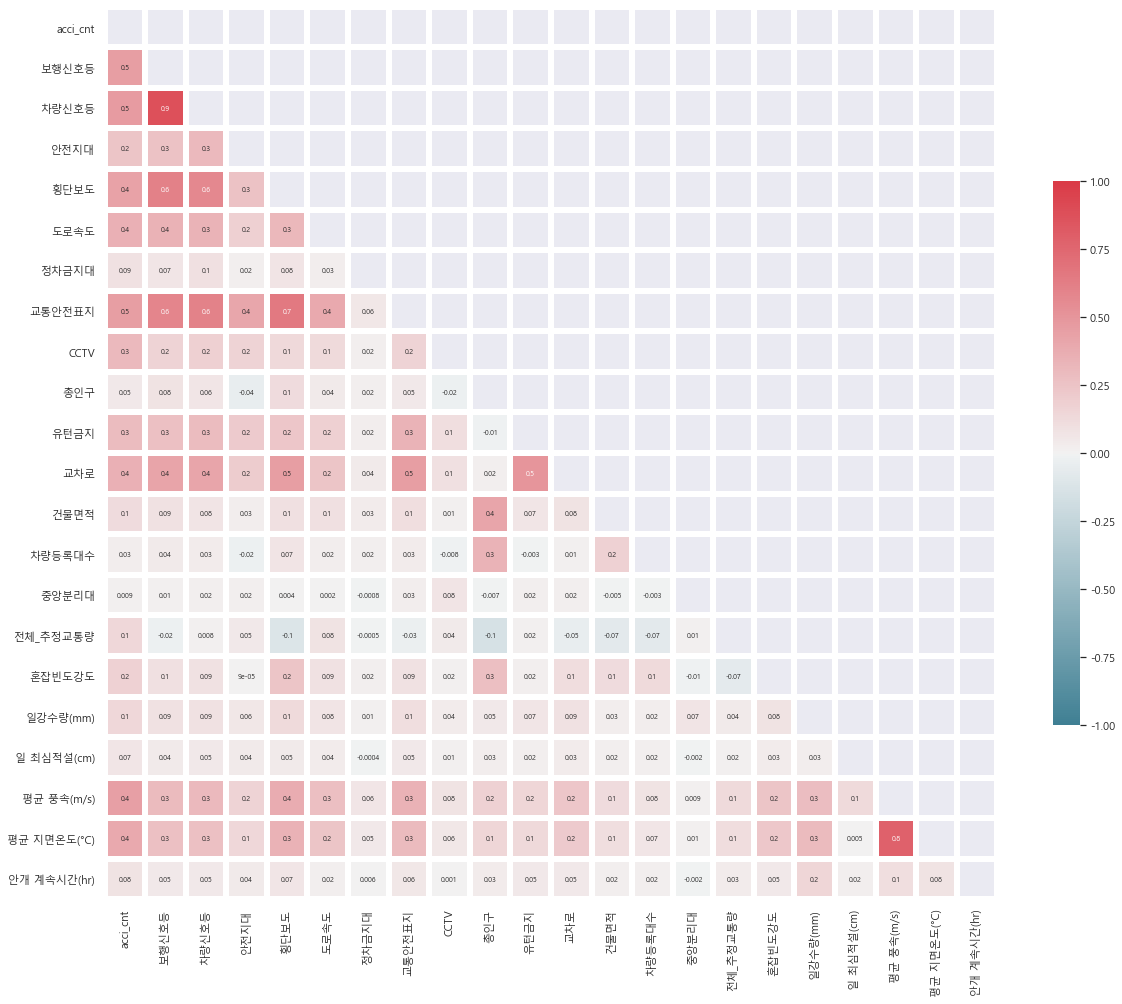

In [29]:
cor(final_table)

차량 신호등 - 보행신호등이 상관관계가 높으나 vif 수치가 이상치를 벗어나지 않고, 분석에 유의미한 데이터라 판단되어 그대로 사용